# Network Traffic Analysis for Anomaly Detection
This notebook demonstrates a simple network traffic analysis project for detecting anomalies in packet sizes.

## Step 1: Data Collection
In a real-world scenario, you would collect actual network traffic data. For this example, we'll generate sample data.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Set plot style
plt.style.use('ggplot')

def generate_sample_data(num_records=1000):
    np.random.seed(42)
    data = {
        'timestamp': pd.date_range(start='2024-01-01', periods=num_records, freq='1min'),
        'source_ip': np.random.choice(['192.168.1.' + str(i) for i in range(1, 11)], num_records),
        'destination_ip': np.random.choice(['10.0.0.' + str(i) for i in range(1, 6)], num_records),
        'protocol': np.random.choice(['TCP', 'UDP', 'ICMP'], num_records, p=[0.7, 0.25, 0.05]),
        'packet_size': np.random.normal(500, 150, num_records).astype(int),
    }
    return pd.DataFrame(data)

df = generate_sample_data()
print(df.head())
print(f"\nDataset shape: {df.shape}")


            timestamp    source_ip destination_ip protocol  packet_size
0 2024-01-01 00:00:00  192.168.1.7       10.0.0.1      TCP          511
1 2024-01-01 00:01:00  192.168.1.4       10.0.0.4      TCP          503
2 2024-01-01 00:02:00  192.168.1.8       10.0.0.3      TCP          252
3 2024-01-01 00:03:00  192.168.1.5       10.0.0.4      TCP          680
4 2024-01-01 00:04:00  192.168.1.7       10.0.0.4      TCP          371

Dataset shape: (1000, 5)


## Step 2: Data Preprocessing
We'll extract the hour from the timestamp for time-based analysis.

In [2]:
def preprocess_data(df):
    df['hour'] = df['timestamp'].dt.hour
    return df

df = preprocess_data(df)
print(df.head())
print("\nDataset info:")
df.info()


            timestamp    source_ip destination_ip protocol  packet_size  hour
0 2024-01-01 00:00:00  192.168.1.7       10.0.0.1      TCP          511     0
1 2024-01-01 00:01:00  192.168.1.4       10.0.0.4      TCP          503     0
2 2024-01-01 00:02:00  192.168.1.8       10.0.0.3      TCP          252     0
3 2024-01-01 00:03:00  192.168.1.5       10.0.0.4      TCP          680     0
4 2024-01-01 00:04:00  192.168.1.7       10.0.0.4      TCP          371     0

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       1000 non-null   datetime64[ns]
 1   source_ip       1000 non-null   object        
 2   destination_ip  1000 non-null   object        
 3   protocol        1000 non-null   object        
 4   packet_size     1000 non-null   int64         
 5   hour            1000 non-null   int32      

## Step 3: Exploratory Data Analysis
Let's visualize some key aspects of our network traffic data.

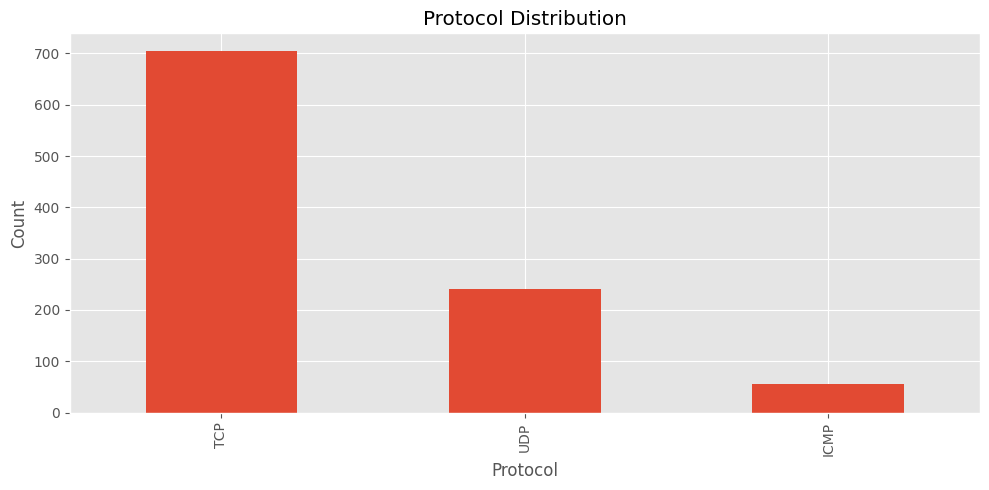

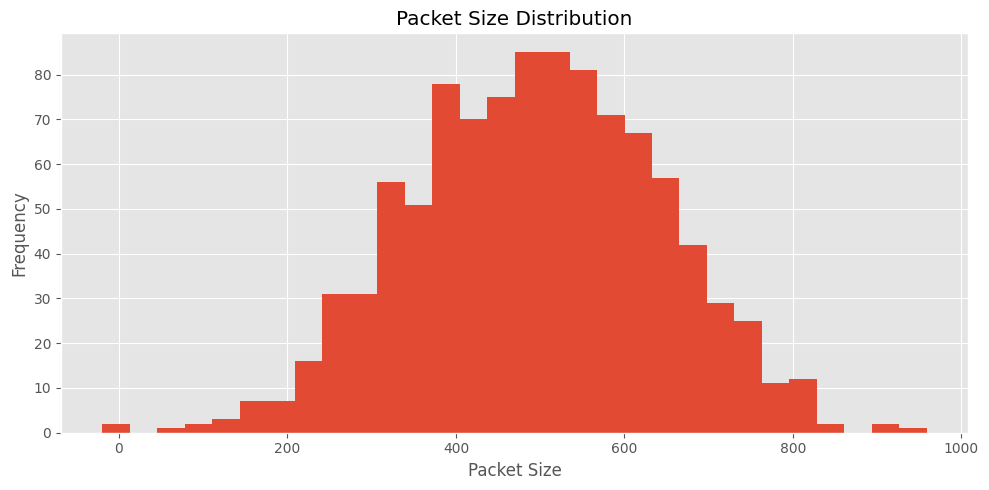

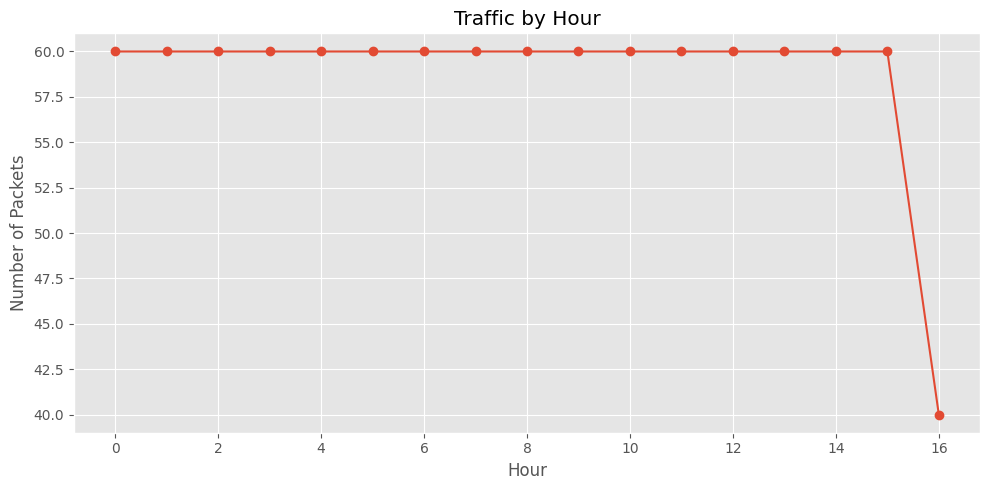

In [3]:
# Protocol distribution
protocol_counts = df['protocol'].value_counts()
plt.figure(figsize=(10, 5))
protocol_counts.plot(kind='bar')
plt.title('Protocol Distribution')
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Packet size distribution
plt.figure(figsize=(10, 5))
df['packet_size'].hist(bins=30)
plt.title('Packet Size Distribution')
plt.xlabel('Packet Size')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Traffic by hour
hourly_traffic = df.groupby('hour').size()
plt.figure(figsize=(10, 5))
hourly_traffic.plot(kind='line', marker='o')
plt.title('Traffic by Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Packets')
plt.tight_layout()
plt.show()


## Step 4: Anomaly Detection
We'll use Z-scores to identify anomalies in packet sizes.

Number of anomalies detected: 3


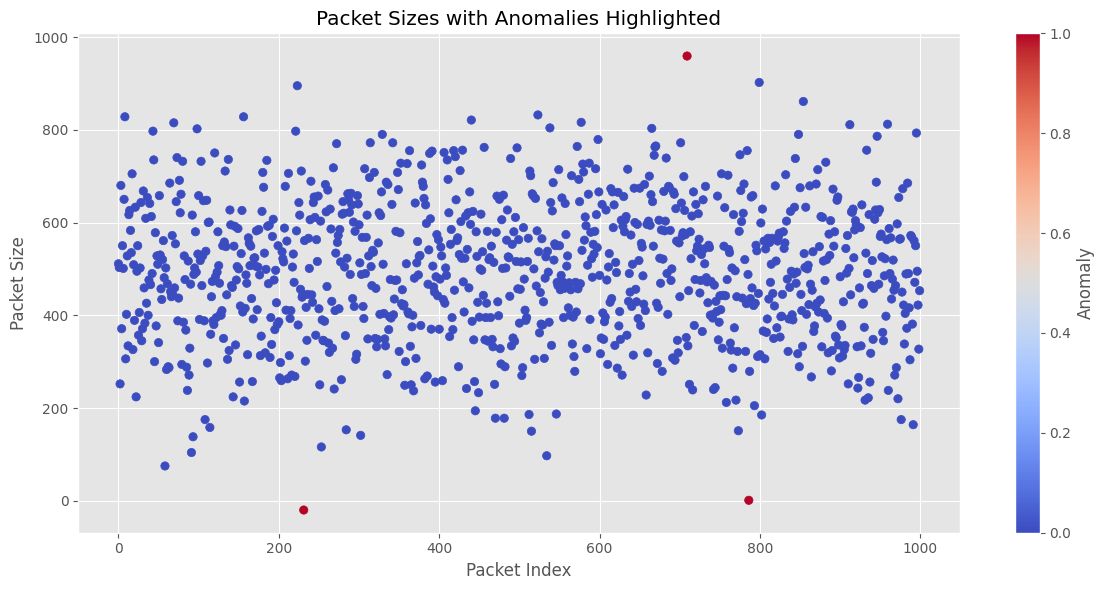

In [4]:
def detect_anomalies(df, threshold=3):
    z_scores = stats.zscore(df['packet_size'])
    df['anomaly'] = abs(z_scores) > threshold
    return df

df = detect_anomalies(df)
print(f"Number of anomalies detected: {df['anomaly'].sum()}")

# Visualize anomalies
plt.figure(figsize=(12, 6))
plt.scatter(df.index, df['packet_size'], c=df['anomaly'], cmap='coolwarm')
plt.title('Packet Sizes with Anomalies Highlighted')
plt.xlabel('Packet Index')
plt.ylabel('Packet Size')
plt.colorbar(label='Anomaly')
plt.tight_layout()
plt.show()


## Step 5: Reporting
Generate a summary report of our findings.

In [5]:
def generate_report(df):
    total_packets = len(df)
    anomalies = df['anomaly'].sum()
    anomaly_percentage = (anomalies / total_packets) * 100

    print(f"Total packets analyzed: {total_packets}")
    print(f"Number of anomalies detected: {anomalies}")
    print(f"Percentage of anomalies: {anomaly_percentage:.2f}%")

    print("\nTop 10 potential anomalies:")
    return df[df['anomaly']].nlargest(10, 'packet_size')[['timestamp', 'source_ip', 'destination_ip', 'protocol', 'packet_size']]

anomaly_report = generate_report(df)
display(anomaly_report)


Total packets analyzed: 1000
Number of anomalies detected: 3
Percentage of anomalies: 0.30%

Top 10 potential anomalies:


,timestamp,source_ip,destination_ip,protocol,packet_size
709,2024-01-01 11:49:00,192.168.1.4,10.0.0.1,TCP,959
786,2024-01-01 13:06:00,192.168.1.7,10.0.0.5,TCP,1
231,2024-01-01 03:51:00,192.168.1.1,10.0.0.3,TCP,-20


# Conclusion
This notebook demonstrates a basic network traffic analysis for anomaly detection. Key steps included:

Data generation (simulating real network traffic data)
Data preprocessing
Exploratory data analysis with visualizations
Simple anomaly detection using Z-scores
Reporting and visualization of results
This project can be extended by:

Using real network traffic data
Implementing more sophisticated anomaly detection algorithms
Adding interactive visualizations
Creating a dashboard for real-time monitoring